In [1]:
import wrf_management.plot.plot as wp
import os
import pandas as pd
from importlib import reload
import xarray as xr

reload(wp)
import wrf
from datetime import datetime as dt
import matplotlib.pyplot as plt
import wrf_management.project_global_constants as gc
import seaborn as sns

In [5]:
path = os.path.join(gc.PATH_DATA, 'runs/run_2019_02_27/wrf')
print(gc.PATH_DATA)
df = wp.get_df_list(path=path, pref='wrfout_d')

/wrk/aliagadi/DONOTREMOVE/wrf_management_data


In [6]:
d = 2
pos = 0
_b = df.index.get_level_values('d') == d
row = df[_b].iloc[0]
ar = xr.open_dataset(row.p)

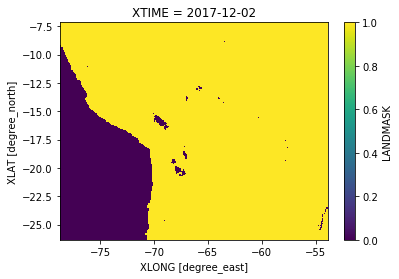

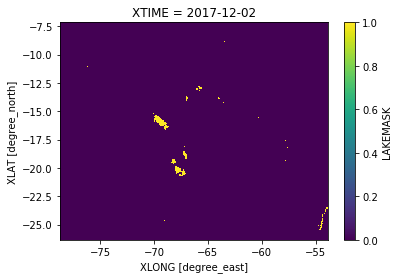

In [7]:
l2p = ['LANDMASK', 'LAKEMASK']
for l in l2p:
    fig, ax = plt.subplots()
    ar1 = ar[l]
    ar1 = ar1.sel(Time=0)
    ar1.plot(x='XLONG', y='XLAT')

In [8]:
lam, laM, lom, loM = -17, -15, -70, -68
arr = ar[['SST', 'LAKEMASK']]
b1 = arr.where(
    (arr.XLONG > lom) &
    (arr.XLONG < loM) &
    (arr.XLAT > lam) &
    (arr.XLAT < laM) &
    (arr.LAKEMASK == 1)
)

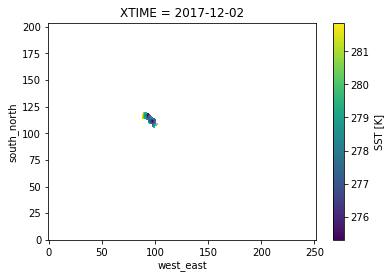

In [9]:
b1.SST[0].plot()

(array([16., 16., 52., 64., 48., 36., 16., 20., 16.,  8.]),
 array([275.28284, 275.9403 , 276.5978 , 277.25528, 277.91278, 278.57025,
        279.22772, 279.88522, 280.5427 , 281.2002 , 281.85767],
       dtype=float32),
 <a list of 10 Patch objects>)

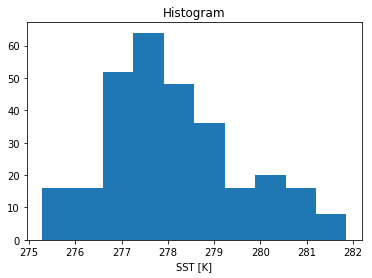

In [10]:
b1.SST.plot()

In [11]:
_b = df.index.get_level_values('d') == d
ddd = df[_b]

/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


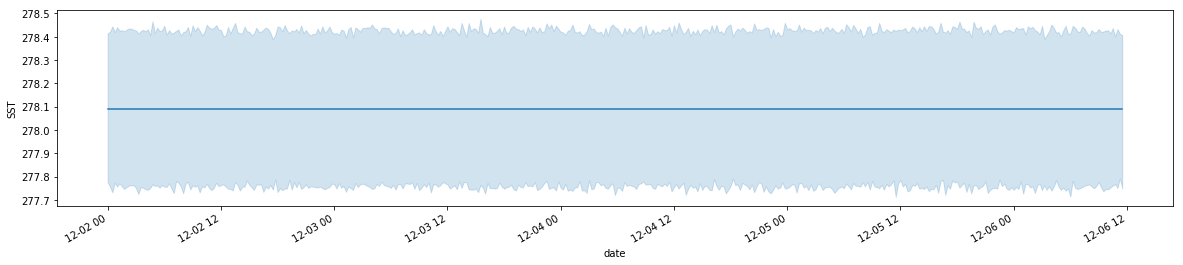

In [12]:
ndf = []
for l, r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam, laM, lom, loM = -17, -15, -70, -68
    arr = ar[['SST', 'LAKEMASK']]
    b1 = arr.where(
        (arr.XLONG > lom) &
        (arr.XLONG < loM) &
        (arr.XLAT > lam) &
        (arr.XLAT < laM) &
        (arr.LAKEMASK == 1)
    )
    df1 = b1.SST.to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date'] = df1.XTIME.astype(dt)
    ndf.append(df1)

nndf = pd.concat(ndf, ignore_index=True)
nndf

fig, ax = plt.subplots()
ax = sns.lineplot(y='SST', x='date', data=nndf, ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)

In [20]:
wp.print_var_starting_with(row.p,'')

Times - 
---------------
XLAT - LATITUDE, SOUTH IS NEGATIVE
---------------
XLONG - LONGITUDE, WEST IS NEGATIVE
---------------
LU_INDEX - LAND USE CATEGORY
---------------
ZNU - eta values on half (mass) levels
---------------
ZNW - eta values on full (w) levels
---------------
ZS - DEPTHS OF CENTERS OF SOIL LAYERS
---------------
DZS - THICKNESSES OF SOIL LAYERS
---------------
VAR_SSO - variance of subgrid-scale orography
---------------
U - x-wind component
---------------
V - y-wind component
---------------
W - z-wind component
---------------
PH - perturbation geopotential
---------------
PHB - base-state geopotential
---------------
T - perturbation potential temperature theta-t0
---------------
THM - either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)-T0, or 2) pert dry pot temp=t
---------------
HFX_FORCE - SCM ideal surface sensible heat flux
---------------
LH_FORCE - SCM ideal surface latent heat flux
---------------
TSK_FORCE - SCM ideal surface skin temperature
----------

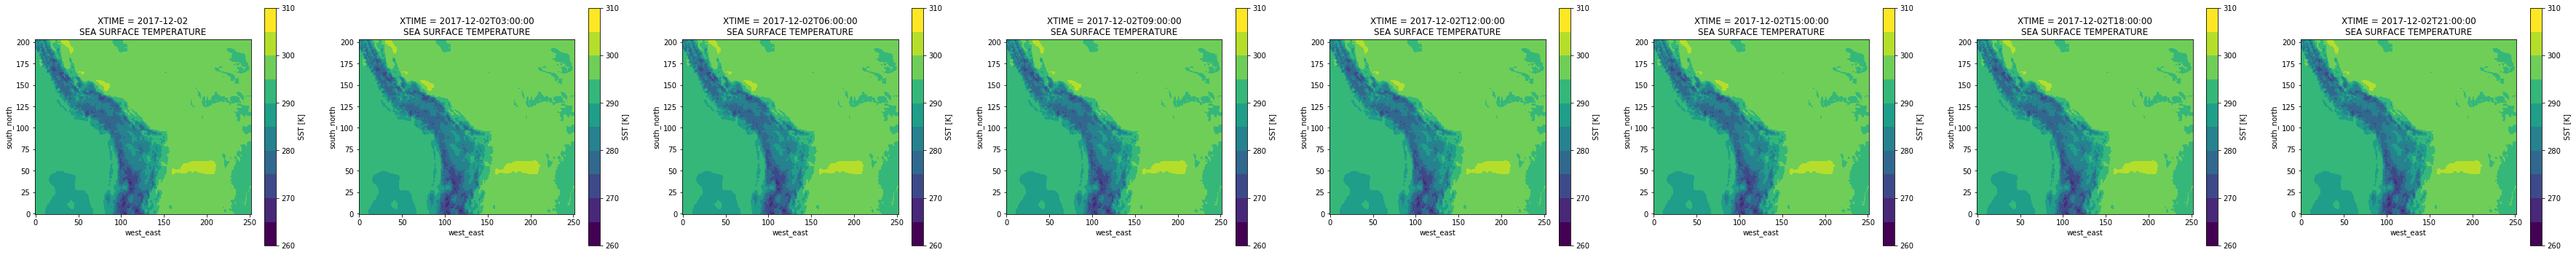

In [14]:
_d4 = df.index.get_level_values('d') == 2
df4 = df[_d4]
plist = ['SST']
skim = ['T', 'TSLB']
adjust = ['T']
vm, vM = 260, 310
lv = round((vM - vm) / 5.) + 1
columns = [0, 3, 6, 9, 12, 15, 18, 21]
nn = 6
fig = plt.figure(d, figsize=(1.3 * nn * len(columns), nn * len(plist)))
ll = 1
for l in plist:
    for c in columns:
        row = df4.iloc[c]
        ar = xr.open_dataset(row.p)
        ax = fig.add_subplot(len(plist), len(columns), ll)
        ar1 = ar[l]
        desc = ar1.description
        ar1 = ar1.isel(Time=0)
        if l in skim: ar1 = ar1[0]
        if l in adjust: ar1 = ar1 + 290
        ar1.plot(ax=ax, levels=lv, vmin=vm, vmax=vM)
        ax.set_title(ax.get_title() +
                     '\n' +
                     desc)
        ax.set_aspect('equal')
        ll = ll + 1

/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


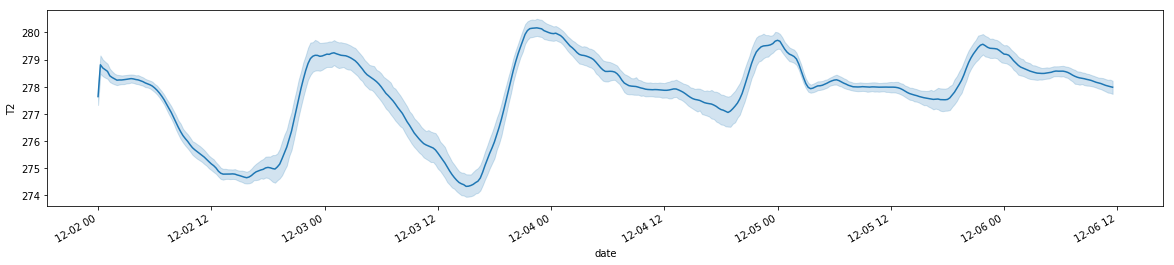

In [15]:
par = 'T2'
ndf = []
for l, r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam, laM, lom, loM = -17, -15, -70, -68
    arr = ar[[par, 'LAKEMASK']]
    b1 = arr.where(
        (arr.XLONG > lom) &
        (arr.XLONG < loM) &
        (arr.XLAT > lam) &
        (arr.XLAT < laM) &
        (arr.LAKEMASK == 1)
    )
    df1 = b1[par].to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date'] = df1.XTIME.astype(dt)
    ndf.append(df1)

nndf = pd.concat(ndf, ignore_index=True)
nndf


fig, ax = plt.subplots()
ax = sns.lineplot(y=par, x='date', data=nndf, ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)

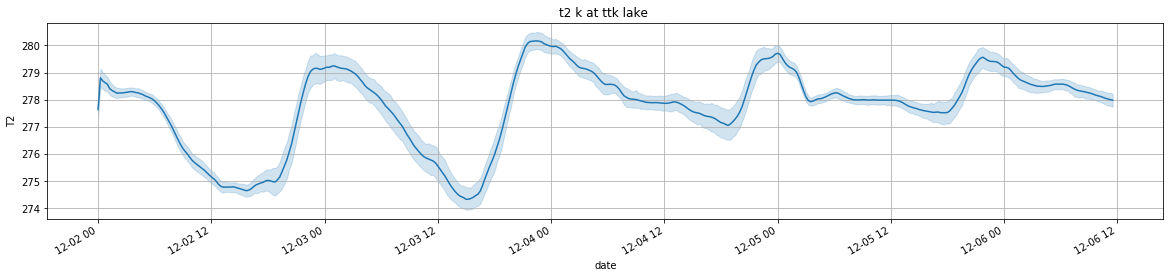

In [16]:
ax.set_title('t2 k at ttk lake ')
ax.grid()
fig

/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


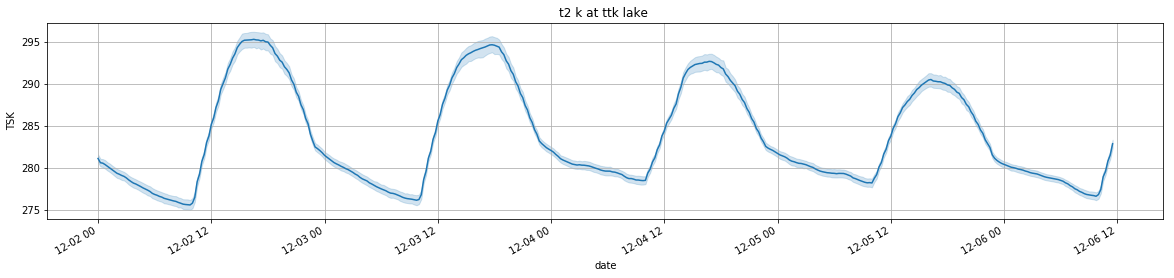

In [22]:
par = 'TSK'
ndf = []
for l, r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam, laM, lom, loM = -17, -15, -70, -68
    arr = ar[[par, 'LAKEMASK']]
    b1 = arr.where(
        (arr.XLONG > lom) 
        &(arr.XLONG < loM) 
        &(arr.XLAT > lam) 
        &(arr.XLAT < laM) 
#         &(arr.LAKEMASK == 1)
    )
    df1 = b1[par].to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date'] = df1.XTIME.astype(dt)
    ndf.append(df1)

nndf = pd.concat(ndf, ignore_index=True)
nndf

import seaborn as sns

fig, ax = plt.subplots()
ax = sns.lineplot(y=par, x='date', data=nndf, ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)
ax.set_title('t2 k at ttk lake ')
ax.grid()